In [1]:
import pandas as pd
import servicex as sx
import awkward as ak
from func_adl_servicex import ServiceXSourceUpROOT
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 200 # make figures bigger and more readable

In [2]:
dataset_name = "cms:DYJetsToLL_M-50_TuneCP5_13TeV-amcatnloFXFX-pythia8/RunIIAutumn18NanoAODv7-Nano02Apr2020_102X_upgrade2018_realistic_v21_ext2-v1/NANOAODSIM"
sx_dataset = sx.ServiceXDataset(dataset_name, "uproot")
ds = ServiceXSourceUpROOT(sx_dataset, "Events")
filtered_missing_ET_5 = ds.Where(lambda event: Zip({'p4': Zip({'pt':   event.Muon_pt,
                                                               'eta':  event.Muon_eta,
                                                               'phi':  event.Muon_phi,
                                                               'mass': event.Muon_mass}).ToFourMomenta(),
                                                    'charge': event.Muon_charge})
                                               .Choose(2)
                                               .Where(lambda pair: pair[0].charge * pair[1].charge < 0)
                                               .Select(lambda pair: (pair[0].p4 + pair[1].p4).mass)
                                               .Where(lambda mass: 60 < mass and mass < 120)
                                               .Count() > 0
                                ).Select(lambda event: event.MET_pt).AsAwkwardArray().value()

cms:DYJetsToLL_M-50_...:   0%|          | 0/9000000000.0 [00:00]

        cms:DYJetsToLL_M-50_... Downloaded:   0%|          | 0/9000000000.0 [00:00]

In [3]:
filtered_missing_ET_5

<Array [46.6, 45.7, 19.6, ... 31.2, 34.9, 43.3] type='30164640 * float32'>

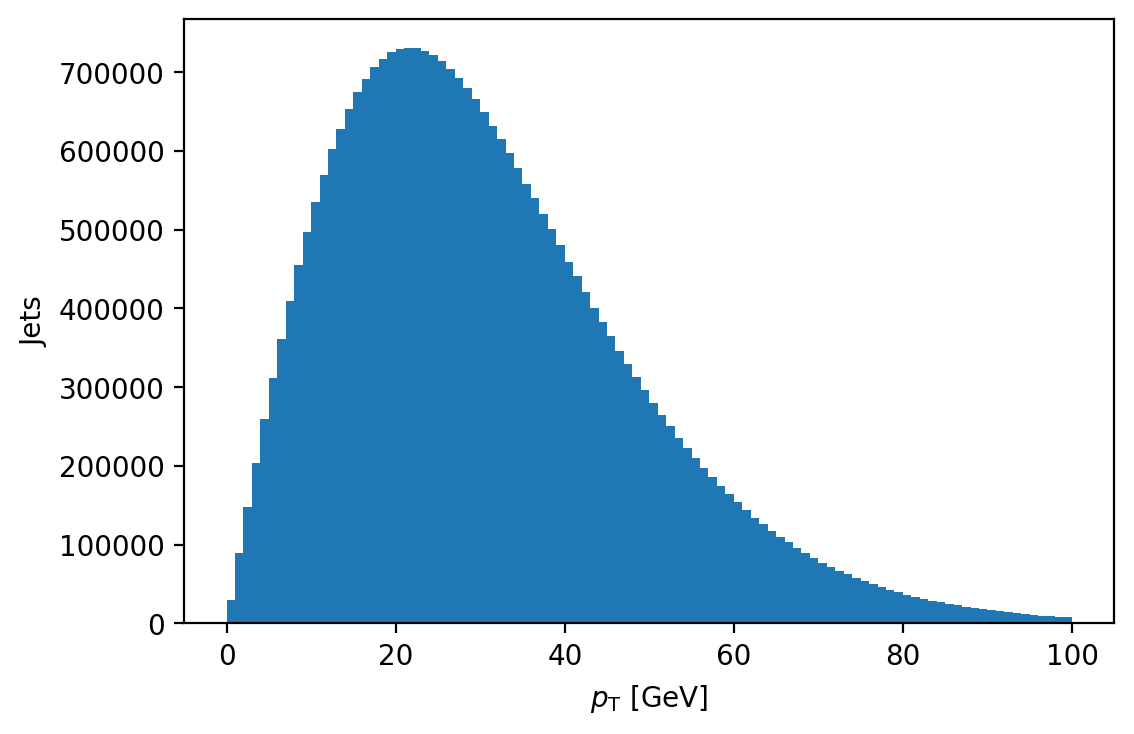

In [4]:
plt.hist([filtered_missing_ET_5], bins=100, range=(0, 100))
plt.xlabel(r'$p_\mathrm{T}$ [GeV]')
plt.ylabel('Jets')
plt.show()